In [1]:
"""
1. Dropped ball simulation (1D), constant acceleration (no air-resistance)
1v2: use functions to improve this script!

2. 2D goal kick (2D), constant acceleration
3. ISS in orbit around the Earth (orbital motion, one-force, varying acceleration)
4. Star cluster (still just gravity, but many objects)
"""

'\n1. Dropped ball simulation (1D), constant acceleration (no air-resistance)\n1v2: use functions to improve this script!\n\n2. 2D goal kick (2D), constant acceleration\n3. ISS in orbit around the Earth (orbital motion, one-force, varying acceleration)\n4. Star cluster (still just gravity, but many objects)\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NT = 100
times = np.zeros(NT)
heights = np.zeros(NT)
velocities = np.zeros(NT)

In [4]:
heights[0] = 20 # meters
g = -9.8 # m/s^2

In [5]:
def updateVelocity (time):
    return g*time

In [6]:
def updateHeight (time):
    return heights[0] + velocities[0]*time + 0.5*g*time**2

In [7]:
now = 0
while heights[now] > 0:
    now += 1
    times[now] = times[now-1] + 0.1
    
    velocities[now] = updateVelocity(times[now])
    heights[now]    =   updateHeight(times[now])

In [8]:
indices    = np.where(heights > 0)

heights    =    heights[indices[0]]
velocities = velocities[indices[0]]
times      =      times[indices[0]]

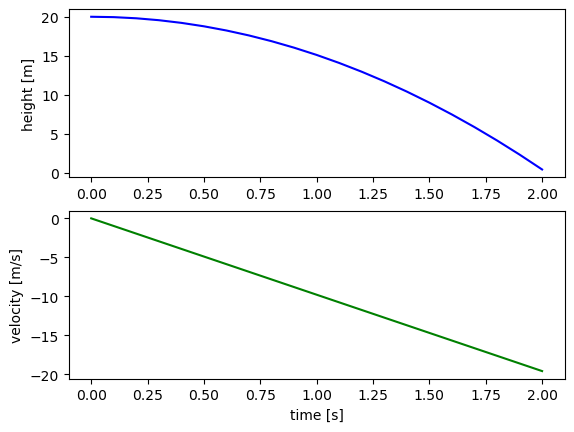

In [9]:
fig,axs = plt.subplots(2)
axs[0].plot(times, heights, color="blue", label="height")
axs[1].plot(times, velocities, color="green", label="velocity")
#axs[0].legend()
axs[1].set_xlabel("time [s]")
axs[0].set_ylabel("height [m]")
axs[1].set_ylabel("velocity [m/s]")
plt.savefig("dropped_ball.png")
plt.show()

In [10]:
# Goal Kick

In [11]:
NT = 100
times = np.zeros(NT)
heights = np.zeros(NT)
velocities_y = np.zeros(NT)
distances = np.zeros(NT)
velocities_x = np.zeros(NT)

In [12]:
g = -9.8

initial_height = 0
initial_velocity = 20
kick_angle = 45
angle_rad = np.radians(kick_angle)

initial_velocity_x = initial_velocity * np.cos(angle_rad)
initial_velocity_y = initial_velocity * np.sin(angle_rad)

In [13]:
def update_vertical_velocity(time):
    return initial_velocity_y + g * time

In [14]:
def update_distance(time):
    return initial_velocity_x * time

In [15]:
def update_height(time):
    return initial_height + initial_velocity_y * time + 0.5 * g * time ** 2

In [16]:
def update_horizontal_velocity(time):
    return initial_velocity_x

In [17]:
now = 0
while heights[now] >= 0 and now < NT - 1:
    now += 1
    times[now] = times[now - 1] + 0.1

    velocities_y[now] = update_vertical_velocity(times[now])
    velocities_x[now] = update_horizontal_velocity(times[now])
    
    heights[now] = update_height(times[now])
    distances[now] = update_distance(times[now])

In [18]:
valid_indices = np.where(times > 0)
times = np.append(times[0], times[valid_indices])
heights = np.append(heights[0], heights[valid_indices])
velocities_y = np.append(velocities_y[0], velocities_y[valid_indices])
distances = np.append(distances[0], distances[valid_indices])
velocities_x = np.append(velocities_x[0], velocities_x[valid_indices])

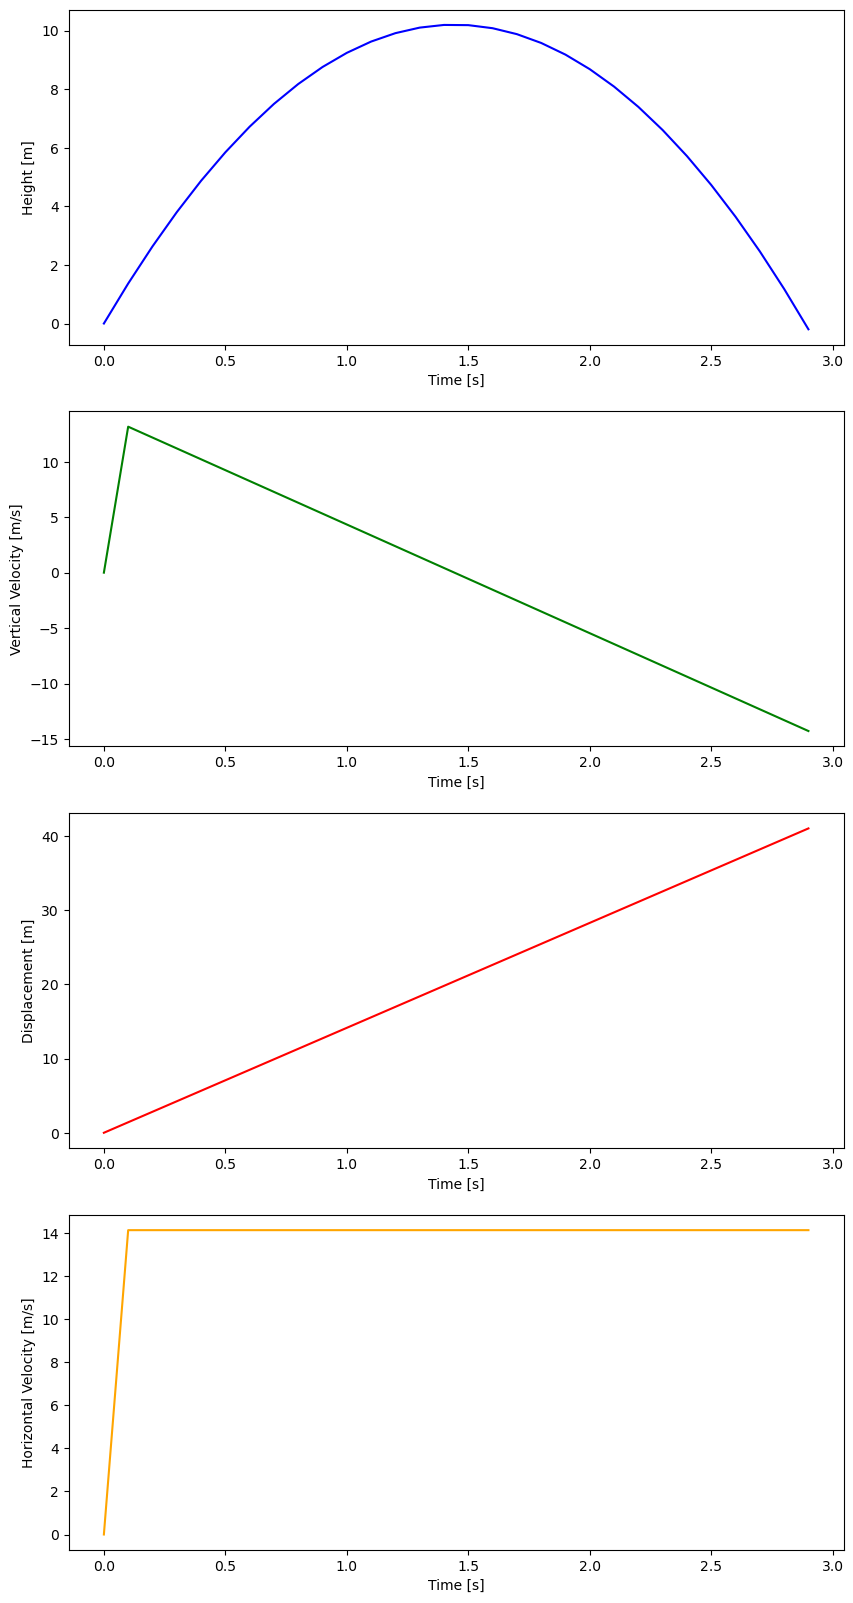

In [19]:
fig, axs = plt.subplots(4, figsize=(10, 20))
axs[0].plot(times, heights, color="blue")
axs[1].plot(times, velocities_y, color="green")
axs[2].plot(times, distances, color="red")
axs[3].plot(times, velocities_x, color="orange")

axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Height [m]")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Vertical Velocity [m/s]")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Displacement [m]")
axs[3].set_xlabel("Time [s]")
axs[3].set_ylabel("Horizontal Velocity [m/s]")

plt.savefig("goal_kick.png")
plt.show()

In [20]:
# Goal Kick V2

In [21]:
class SoccerBall:
    def __init__(self, NT, initial_height, initial_velocity, kick_angle, g, dt):
        self.NT = NT
        self.g = g
        self.dt = dt
        
        self.current_time = 0
        self.initial_height = initial_height
        self.initial_velocity = initial_velocity
        self.kick_angle = np.radians(kick_angle)
        
        self.initial_velocity_x = initial_velocity * np.cos(self.kick_angle)
        self.initial_velocity_y = initial_velocity * np.sin(self.kick_angle)
        
        self.times = np.zeros(NT)
        self.heights = np.zeros(NT)
        self.velocities_y = np.zeros(NT)
        self.distances = np.zeros(NT)
        self.velocities_x = np.zeros(NT)
        
        self.heights[0] = initial_height
        self.velocities_x[0] = self.initial_velocity_x
        self.velocities_y[0] = self.initial_velocity_y

        self.simulate()
        self.plot_results()

    def update_vertical_velocity(self):
        return self.initial_velocity_y + self.g * self.current_time

    def update_horizontal_velocity(self):
        return self.initial_velocity_x

    def update_height(self):
        return self.initial_height + self.initial_velocity_y * self.current_time + \
        0.5 * self.g * self.current_time ** 2

    def update_distance(self):
        return self.initial_velocity_x * self.current_time

    def simulate(self):
        now = 0
        while self.heights[now] >= 0 and now < self.NT - 1:
            now += 1
            self.current_time += self.dt
            self.times[now] = self.current_time

            self.velocities_y[now] = self.update_vertical_velocity()
            self.velocities_x[now] = self.update_horizontal_velocity()
            
            self.heights[now] = self.update_height()
            self.distances[now] = self.update_distance()
        
        valid_indices = np.where(self.times > 0)
        self.times = np.append(self.times[0], self.times[valid_indices])
        self.heights = np.append(self.heights[0], self.heights[valid_indices])
        self.velocities_y = np.append(self.velocities_y[0], self.velocities_y[valid_indices])
        self.distances = np.append(self.distances[0], self.distances[valid_indices])
        self.velocities_x = np.append(self.velocities_x[0], self.velocities_x[valid_indices])

    def plot_results(self):
        fig, axs = plt.subplots(4, figsize=(10, 20))
        axs[0].plot(self.times, self.heights, color="blue")
        axs[1].plot(self.times, self.velocities_y, color="green")
        axs[2].plot(self.times, self.distances, color="red")
        axs[3].plot(self.times, self.velocities_x, color="orange")

        axs[0].set_xlabel("Time [s]")
        axs[0].set_ylabel("Height [m]")
        axs[1].set_xlabel("Time [s]")
        axs[1].set_ylabel("Vertical Velocity [m/s]")
        axs[2].set_xlabel("Time [s]")
        axs[2].set_ylabel("Displacement [m]")
        axs[3].set_xlabel("Time [s]")
        axs[3].set_ylabel("Horizontal Velocity [m/s]")

        plt.show()

In [22]:
NT = 100
initial_height = 0
initial_velocity = 20
kick_angle = 45
g = -9.8
dt = 0.1

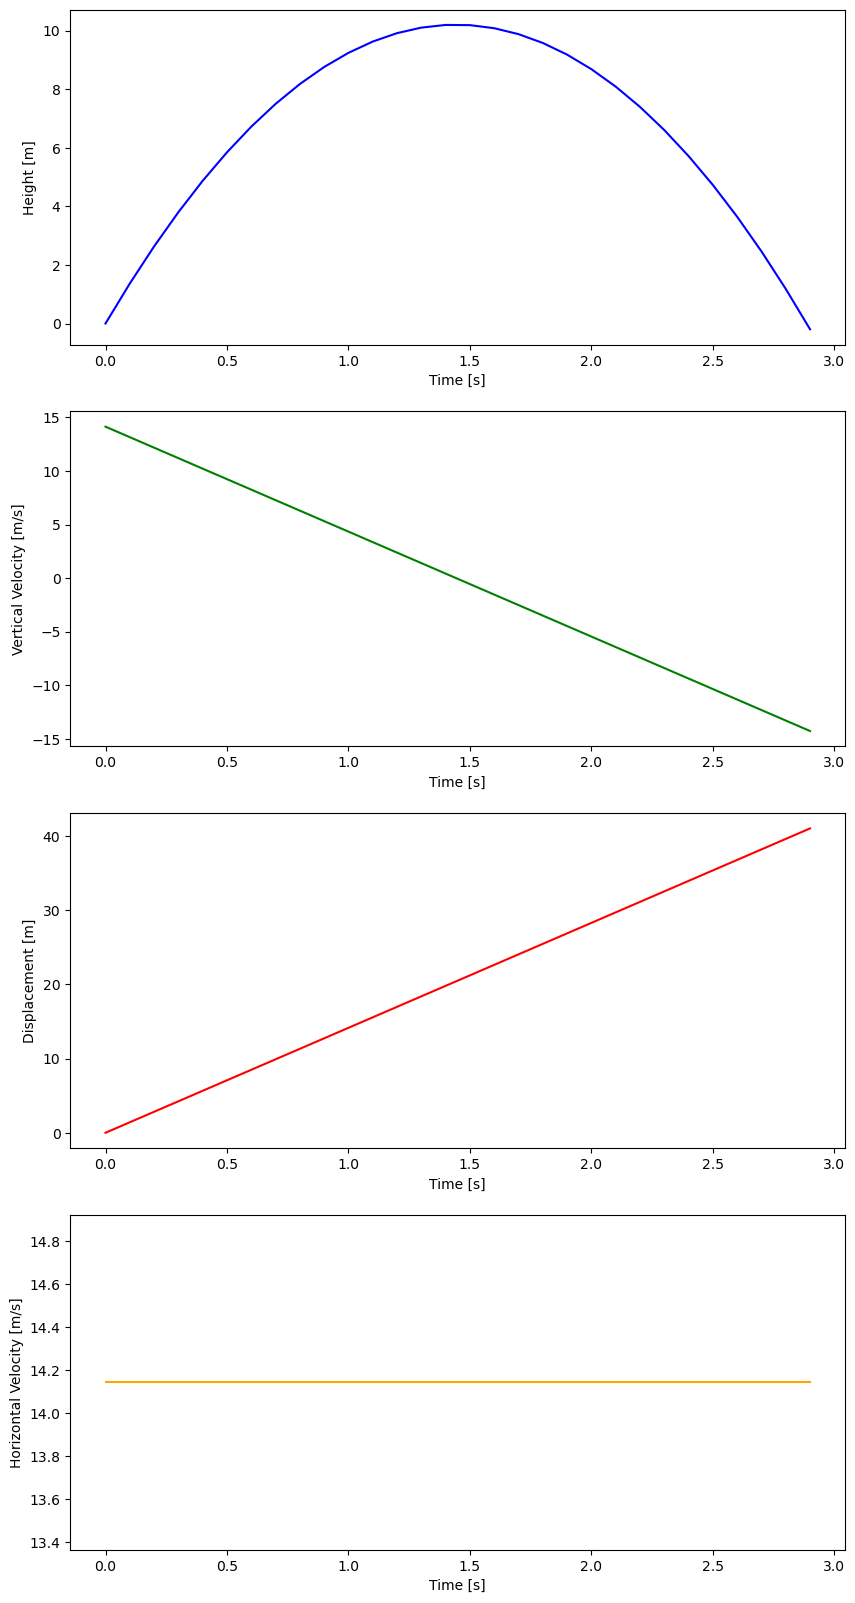

In [23]:
soccer_ball = SoccerBall(NT, initial_height, initial_velocity, kick_angle, g, dt)

In [30]:
class GravitySolver:
    def __init__(self, dt, problem_type, NT, dataI):
        self.problem_type = problem_type
        self.dt = dt
        self.NT = NT
        
        self.init_constants()
        self.init_arrays()
        self.set_initial_conditions(dataI)

        self.simulate()
        self.clean_data()
        self.save_results()
        self.plot_simulation(self.data[3, :], self.data[6, :], self.data[9, :])

    def init_constants(self):
        self.NewtonG = 6.67e-11 # m^3 kg^-1 s^-2 [N m^2 kg^-2]
        self.gravEarth = 9.8 # m/s^2 gravitational acceleration close to Earth's surface
        
    def init_arrays(self):
        #self.data = np.zeros((?, NT))
        #time = 0, posx = 1, posy = 2, posz = 3, velx = 4, vely = 5, velz = 6, accx = 7, accy = 8, accz = 9
        self.data = np.zeros((10, NT))
        

    def set_initial_conditions(self, dataI):
        self.data[1:, 0] = dataI

    def update_time(self):
        return self.data[0, self.index-1] + self.dt
    
    def update_posx(self):
        pass

    def update_posy(self):
        pass

    def update_posz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[3, 0] + self.data[6, 0]*self.data[0, self.index] + \
                   0.5 * self.data[10, 0] * self.data[0, self.index]**2

    def update_posz(self):
        return self.data[3, self.index-1] + self.data[6, self.index-1]*(dt) + \
               0.5 * self.data[9, self.index-1] * (dt)**2
        
    def update_velx(self):
        pass

    def update_vely(self):
        pass

    def update_velz_theoretical(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[6, 0] + self.data[10, self.index-1] * self.data[0, self.index]

    def update_velz(self):
        return self.data[6, self.index-1] + self.data[9, self.index-1] * (dt)
        
    def update_accx(self):
        pass
    
    def update_accy(self):
        pass

    def update_accz(self):
        if problem_type == "EarthSurfaceProblem":
            return self.data[9, 0]
            
    def simulate(self):
        for index in range(1,self.NT):
            self.index = index
            list_of_data = [self.update_time, self.update_posx, self.update_posy, self.update_posz, self.update_velx,
                           self.update_vely, self.update_velz, self.update_accx, self.update_accy, self.update_accz]
           
            for jj, function in enumerate(list_of_data):
                self.data[jj, self.index] = function()
            
            if self.problem_type == "EarthSurfaceProblem" and self.data[3, self.index] <= 0:
                break


    def clean_data(self):
        cleandata = []
        indices = np.where(self.data[0, :] > 0)[0]

        for i in range (self.data.shape[0]):
            cleandata.append(np.append(self.data[i, 0], self.data[i, indices]))
            
        self.data = cleandata
        self.data = np.array(self.data)
      

    def save_results(self):
        filename = "posz0_" + str(self.data[3, 0]) + "_accz0_" + str(self.data[9, 0]) + \
                    "_dt_" + str(self.data[0, 1] - self.data[0, 0]) + "_NT_" + str(self.dt) + ".npz"
            
        np.savez_compressed(filename, self.data)
        
    def plot_simulation(self, posz, velz, accz):
        fig,axs = plt.subplots(3)

        yvalues = [posz, velz, accz]
        ylabels = ["z-position [m]", "z-velocity [m/s]", r"z-acceleration [m/s$^2$]"]
        for self.index in range(len(yvalues)):
            axs[self.index].plot(self.data[0, :], yvalues[self.index])
            axs[self.index].set_ylabel(ylabels[self.index])

        # axs[0].plot(times, posz)
        # axs[1].plot(times, velz)
        # axs[2].plot(times, accz)

        axs[0].set_xlabel("time [s]")
        plt.show()
        self.the_plot = plt.gca()

In [31]:
dt = 0.1
problem_type = "EarthSurfaceProblem"
NT = 1000
dataI = [0, 0, 15, 0, 0, 0, 0, 0, -9.8]

posz: 14.951
velz: -0.9800000000000001
posz: 14.804
velz: -1.9600000000000002
posz: 14.559000000000001
velz: -2.9400000000000004
posz: 14.216000000000001
velz: -3.9200000000000004
posz: 13.775000000000002
velz: -4.9
posz: 13.236000000000002
velz: -5.880000000000001
posz: 12.599000000000004
velz: -6.860000000000001
posz: 11.864000000000004
velz: -7.840000000000002
posz: 11.031000000000004
velz: -8.820000000000002
posz: 10.100000000000005
velz: -9.800000000000002
posz: 9.071000000000005
velz: -10.780000000000003
posz: 7.944000000000004
velz: -11.760000000000003
posz: 6.719000000000004
velz: -12.740000000000004
posz: 5.3960000000000035
velz: -13.720000000000004
posz: 3.9750000000000028
velz: -14.700000000000005
posz: 2.456000000000002
velz: -15.680000000000005
posz: 0.8390000000000016
velz: -16.660000000000004
posz: -0.8759999999999988
velz: -17.640000000000004


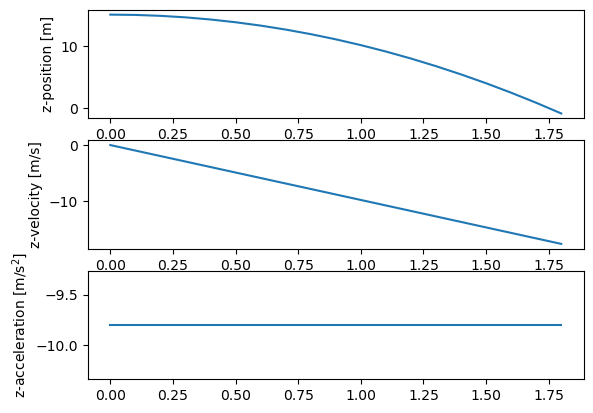

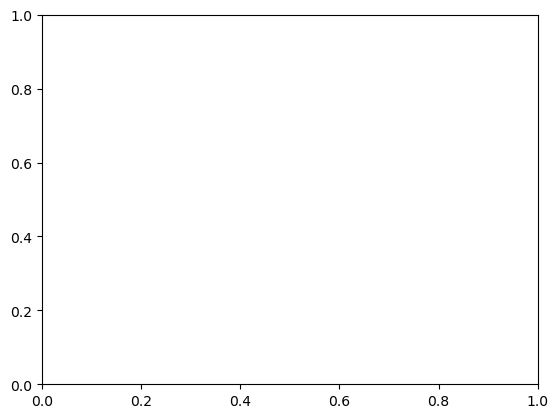

In [32]:
gravitySolverObject = GravitySolver(dt, problem_type, NT, dataI)